In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [2]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV
G=3.881

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$\\
energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$


In [3]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E
def Theta(x):
    if x>0:
        return 1
    else:
        return 0
def Log_p(x,phi,mu,T):
    L = 0
    if (T):
        e_p = math.exp(-(E(x,phi)+mu)/T)
        L += T*math.log(1+e_p)
    return L
def Log_m(x,phi,mu,T):
    if (T):
        e_m = math.exp(-(E(x,phi)-mu)/T)
        L = T*math.log(1+e_m)
    else:
        L=(mu-E(x,phi))*Theta(mu-E(x,phi))
    return L
def integrand(x,phi,mu,T):
    Func=6/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-math.exp(-(E(x,phi)-mu)/T)/(math.exp(-(E(x,phi)-mu)/T)+1)-math.exp(-(E(x,phi)+mu)/T)/(math.exp(-(E(x,phi)+mu)/T)+1))
    else:
        Func*=Theta(E(x,phi)-mu)
    return Func

def D(phi,mu,T):
    N,err=integrate.quad(integrand,0,np.inf,args=(phi,mu,T))
    N=phi/2/G-N
    return N
    
def phi0(T):
    func=lambda x: D(x,0,T)
    z=optimize.root(func,0.368,tol=1e-8)
    return z.x[0]

def Mu(phi,T,fp):
    func=lambda x: D(phi,x,T)
    z=optimize.root(func,fp,tol=1e-8)
    return z.x[0]
def Omega(phi,mu,T):
    ph0=phi0(T)
    Om=(phi*phi-ph0*ph0)/4/G
    Integrand=lambda x: x*x*(E(x,phi)-E(x,ph0)+Log_p(x,phi,mu,T)+Log_m(x,phi,mu,T))
    Int,err=integrate.quad(Integrand, 0, np.inf)
    Int*=-6/math.pi/math.pi
    Om+=Int
    return Om

In [8]:
#найдем mu_star
N=200
#Т_крит примерно 0.01
Tc=0
mu_star=[]
TT=[]
T_range=np.linspace(0,0.2,N)
crit=1
k=0
while(k<N)and(crit):
    l=phi0(T_range[k])-0.02
    eps=l/N
    start=phi0(T_range[k])-eps
    mu0=Mu(start,T_range[k],0.37)
    phi_range=np.linspace(phi0(T_range[k]),0.02,N)
    mu_range=[]
    for phi in phi_range:
        if phi==phi0(T_range[k]):
            mu_range.append(0)
        else:
            mu0=Mu(phi,T_range[k],mu0)
            mu_range.append(mu0)
    #расчет давления
    P=[]
    for i in range(N):
        P.append(-Omega(phi_range[i],mu_range[i],T_range[k]))
    #найдем mu_star
    i=0
    while(i<N)and(crit):
        if(P[i]>0)and(P[i-1]<0):
            if(mu_range[i]<mu_range[1]):
                mu_star.append(mu_range[i])
                TT.append(T_range[k])
            else:
                print("1")
                Tc=T_range[k]
                crit=0
        i+=1
    k+=1

1


In [9]:
#расчет phi и mu
n=500
l0=phi0(0)-0.02
l1=phi0(T_range[111])-0.02
l2=phi0(T_range[112])-0.02
l3=phi0(T_range[113])-0.02
eps0=l0/n
eps1=l1/n
eps2=l2/n
eps3=l3/n
start0=phi0(0)-eps1
start1=phi0(T_range[111])-eps1
start2=phi0(T_range[112])-eps2
start3=phi0(T_range[113])-eps3
mu00=Mu(start0,0,0.37)
mu01=Mu(start1,T_range[111],0.37)
mu02=Mu(start2,T_range[112],0.37)
mu03=Mu(start3,T_range[113],0.37)
phi0_range=np.linspace(phi0(0),0.02,n)
phi1_range=np.linspace(phi0(T_range[111]),0.02,n)
phi2_range=np.linspace(phi0(T_range[112]),0.02,n)
phi3_range=np.linspace(phi0(T_range[113]),0.02,n)
mu0_range=[]
mu1_range=[]
mu2_range=[]
mu3_range=[]
for phi in phi0_range:
    if phi==phi0(0):
        mu0_range.append(0)
    else:
        mu00=Mu(phi,0,mu00)
        mu0_range.append(mu00)
for phi in phi1_range:
    if phi==phi0(T_range[111]):
        mu1_range.append(0)
    else:
        mu01=Mu(phi,T_range[111],mu01)
        mu1_range.append(mu01)
for phi in phi2_range:
    if phi==phi0(T_range[112]):
        mu2_range.append(0)
    else:
        mu02=Mu(phi,T_range[112],mu02)
        mu2_range.append(mu02)
for phi in phi3_range:
    if phi==phi0(T_range[113]):
        mu3_range.append(0)
    else:
        mu03=Mu(phi,T_range[113],mu03)
        mu3_range.append(mu03)
        #расчет давления
P0=[]
P1=[]
P2=[]
P3=[]
for i in range(n):
    P0.append(-Omega(phi0_range[i],mu0_range[i],0))
    P1.append(-Omega(phi1_range[i],mu1_range[i],T_range[111]))
    P2.append(-Omega(phi2_range[i],mu2_range[i],T_range[112]))
    P3.append(-Omega(phi3_range[i],mu3_range[i],T_range[113]))

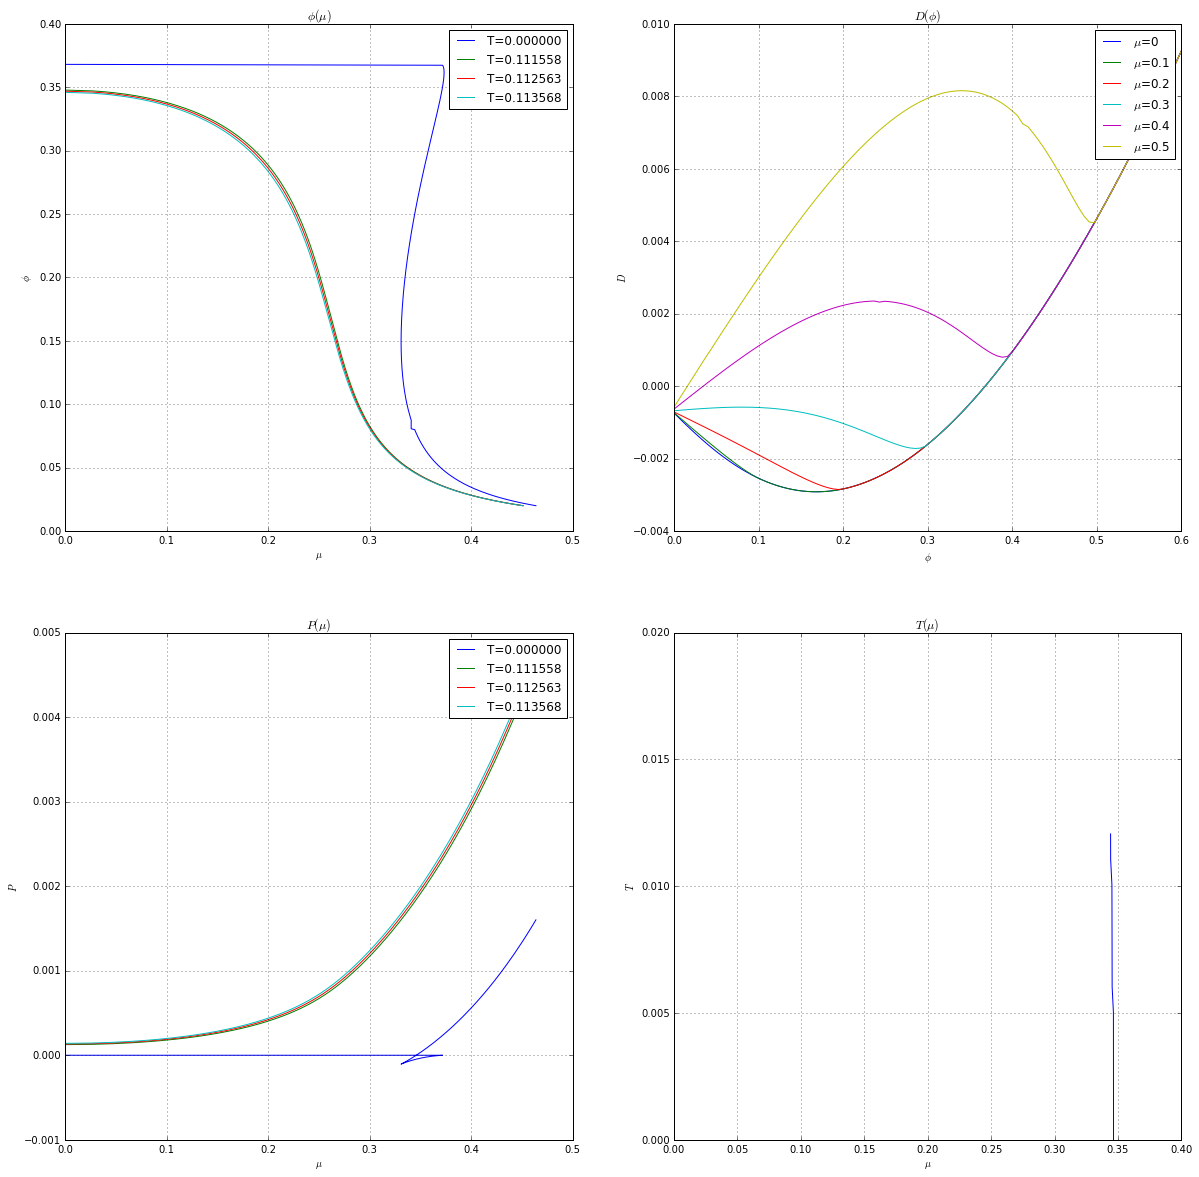

In [10]:
plt.figure(figsize=(20,20))
plt.subplot (2, 2, 1)
plt.plot (mu0_range,phi0_range,label='T=%f'%0)
plt.plot (mu1_range,phi1_range,label='T=%f'%T_range[111])
plt.plot (mu2_range,phi2_range,label='T=%f'%T_range[112])
plt.plot (mu3_range,phi3_range,label='T=%f'%T_range[113])
plt.legend()

plt.title ('$\phi(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(1)

plt.subplot (2, 2, 2)
x_range=np.linspace(0.001,0.6,100)
plt.grid(1)
for i in range(0,6):
    k=i/10
    plt.plot(x_range, [D(phi,k,0) for phi in x_range], label='$\mu$=%g' % k)
plt.title ('$D(\phi)$')
plt.ylabel('$D$')
plt.xlabel('$\phi$')
plt.legend()

plt.subplot (2, 2, 3)
plt.grid(1)
plt.plot (mu0_range,P0,label='T=%f'%0)
plt.plot (mu1_range,P1,label='T=%f'%T_range[111])
plt.plot (mu2_range,P2,label='T=%f'%T_range[112])
plt.plot (mu3_range,P3,label='T=%f'%T_range[113])
plt.title ('$P(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$P$')
plt.legend()

plt.subplot (2, 2, 4)
plt.grid(1)
plt.plot (mu_star,TT)
plt.title ('$T(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$T$')
plt.xlim(0,.40)
plt.ylim(0,0.02)
plt.show()

In [13]:
TT

[0.0,
 0.0010050251256281408,
 0.0020100502512562816,
 0.0030150753768844224,
 0.0040201005025125632,
 0.0050251256281407045,
 0.0060301507537688448,
 0.0070351758793969852,
 0.0080402010050251264,
 0.0090452261306532677,
 0.010050251256281409,
 0.011055276381909548,
 0.01206030150753769]

In [15]:
T_range

array([ 0.        ,  0.00100503,  0.00201005,  0.00301508,  0.0040201 ,
        0.00502513,  0.00603015,  0.00703518,  0.0080402 ,  0.00904523,
        0.01005025,  0.01105528,  0.0120603 ,  0.01306533,  0.01407035,
        0.01507538,  0.0160804 ,  0.01708543,  0.01809045,  0.01909548,
        0.0201005 ,  0.02110553,  0.02211055,  0.02311558,  0.0241206 ,
        0.02512563,  0.02613065,  0.02713568,  0.0281407 ,  0.02914573,
        0.03015075,  0.03115578,  0.0321608 ,  0.03316583,  0.03417085,
        0.03517588,  0.0361809 ,  0.03718593,  0.03819095,  0.03919598,
        0.04020101,  0.04120603,  0.04221106,  0.04321608,  0.04422111,
        0.04522613,  0.04623116,  0.04723618,  0.04824121,  0.04924623,
        0.05025126,  0.05125628,  0.05226131,  0.05326633,  0.05427136,
        0.05527638,  0.05628141,  0.05728643,  0.05829146,  0.05929648,
        0.06030151,  0.06130653,  0.06231156,  0.06331658,  0.06432161,
        0.06532663,  0.06633166,  0.06733668,  0.06834171,  0.06

In [11]:
def bag(B,mu):
    func=mu*mu/2/math.pi/math.pi-B
    return func

In [26]:
#расчет phi и mu
n=500
T=T_range[50]
l=phi0(T)-0.02
eps=l/n
start=phi0(T)-eps
mu0=Mu(start,Tc,0.37)
phi_range=np.linspace(phi0(T),0.02,n)
mu_range=[]
for phi in phi_range:
    if phi==phi0(T):
        mu_range.append(0)
    else:
        mu0=Mu(phi,T,mu0)
        mu_range.append(mu0)
        #расчет давления
P=[]
for i in range(n):
    P.append(-Omega(phi_range[i],mu_range[i],T))

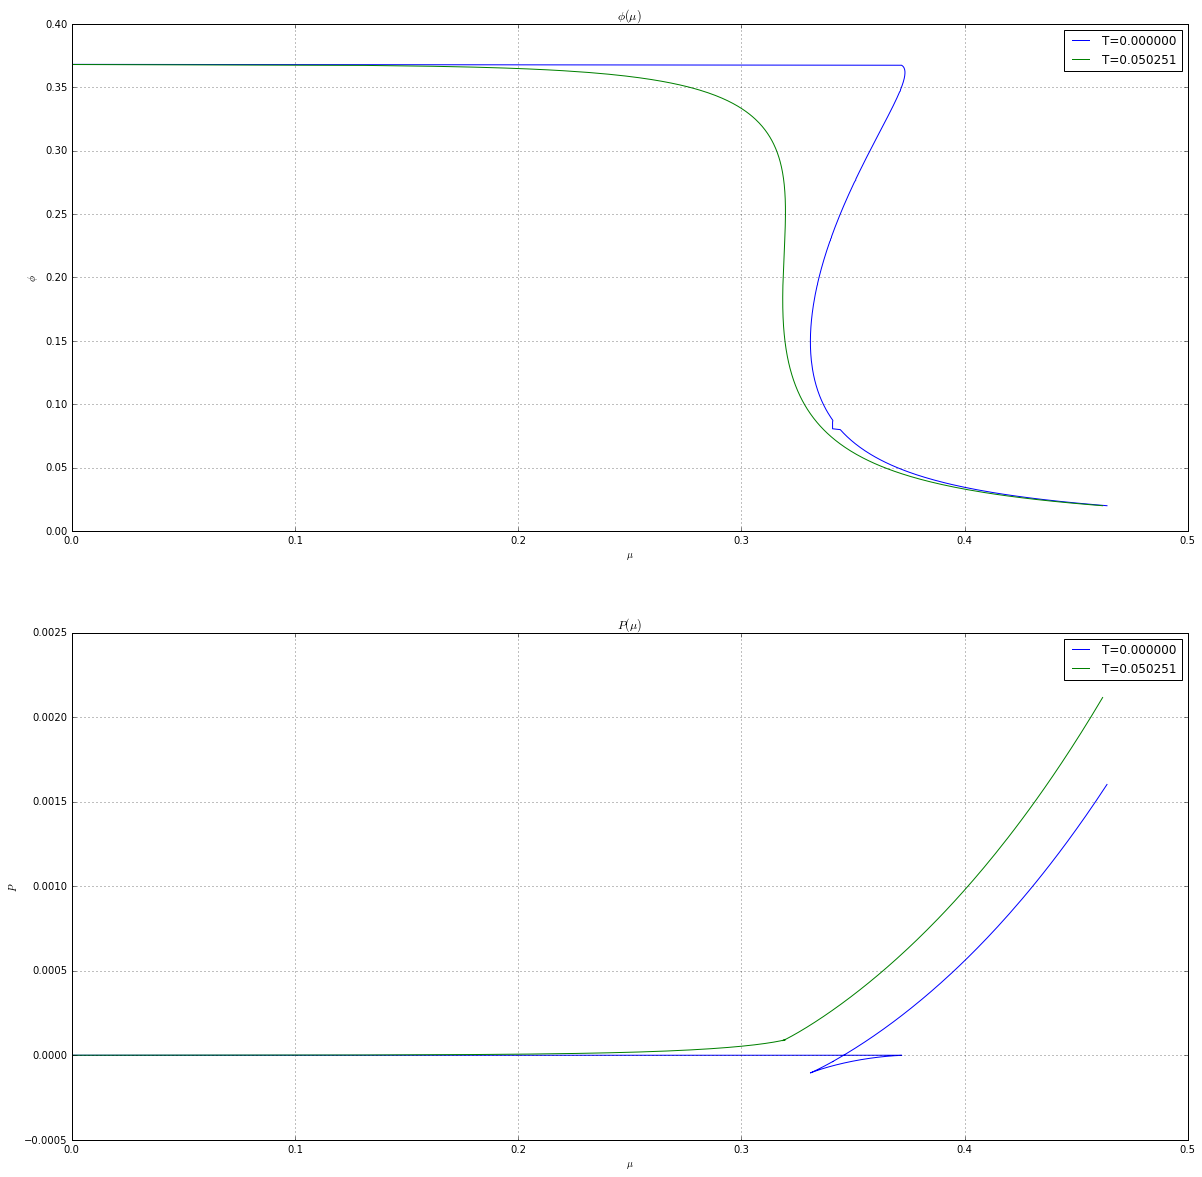

In [27]:
plt.figure(figsize=(20,20))
plt.subplot (2, 1, 1)
plt.plot (mu0_range,phi0_range,label='T=%f'%0)
plt.plot (mu_range,phi_range,label='T=%f'%T)
plt.legend()

plt.title ('$\phi(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(1)
plt.subplot (2, 1, 2)
plt.grid(1)
plt.plot (mu0_range,P0,label='T=%f'%0)
plt.plot (mu_range,P,label='T=%f'%T)
plt.title ('$P(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$P$')
plt.legend()


$p(\mu^*)=0 \rightarrow p=\frac{\mu^2}{2\pi^2}-B=\frac{\mu^2-\mu^{*2}}{2\pi^2}\\
B=\frac{\mu^{*2}}{2\pi^2}$